<h1 style="background-image: linear-gradient(to right, #FFD700, #FF4500); -webkit-background-clip: text; -webkit-text-fill-color: transparent; font-size: 48px; font-family: 'Pacifico', cursive;">Red Wine Quality Prediction Project </h1>


<h1 style="background-image: linear-gradient(to right, #00FFFF, #FF00FF); -webkit-background-clip: text; -webkit-text-fill-color: transparent; font-size: 48px; font-family: 'Pacifico', cursive;">Project Description</h1>


`The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).` 
 
`This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods. `

## Attribute Information 

* Input variables (based on physicochemical tests): 

* 1- Fixed acidity: The amount of fixed acids in the wine.
* 2- Volatile acidity: The amount of volatile acids in the wine.
* 3- Citric acid: The amount of citric acid in the wine.
* 4- Residual sugar: The amount of residual sugar in the wine.
* 5- Chlorides: The amount of chlorides in the wine.
* 6- Free sulfur dioxide: The amount of free sulfur dioxide in the wine.
* 7- Total sulfur dioxide: The total amount of sulfur dioxide in the wine.
* 8- Density: The density of the wine.
* 9- pH: The pH value of the wine.
* 10- Sulphates: The amount of sulphates in the wine.
* 11- Alcohol: The alcohol content of the wine.
* Output variable (based on sensory data): 
* 12 - Quality: The quality score of the wine, ranging from 0 to 10 based on sensory data.

<img src='kym-ellis-aF1NPSnDQLw-unsplash.jpg' style = 'width:300;height:230'>

<h1 style="background-image: linear-gradient(to right, #00FFFF, #FF00FF); -webkit-background-clip: text; -webkit-text-fill-color: transparent; font-size: 48px; font-family: 'Pacifico', cursive;">Importing Dependencies</h1>


In [50]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 


In [2]:
# loading dataset
df= pd.read_csv('winequality-red.csv')

In [3]:
# getting information  about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Observation ;
* The dataset have no null values.
* And the  columns have 11 float and 1 int values. 
* All the independent values are present in float type. 
* The Dependent column have int values.

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Observations

There is a huge gap between 75% and max values of residual sugar column There is a huge gap between 75% and max values of free sulfur dioxide column There is a huge gap between 75% and max value of total sulfur dioxide column

The gap in the values indicate the presence of outliers which needs to be treated for better prediction and analysis.

In [5]:
df.skew() # acceptable range is +/-0.5

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Note : We shall disregard quality because it is our goal label in the dataset. Looking at all of the feature columns, we can see that fixed acidity, volatile acidity, residual sugar, chlorides, free sulphur dioxide, total sulphur dioxide, density, sulphates, and alcohol are all outside the permitted range of +/-0.5. This skewness suggests the presence of outliers in our dataset, which needs to be addressed.

In [6]:
# checking how much unique values each column have

df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

Totally there are 0 null values in the dataset


<AxesSubplot:>

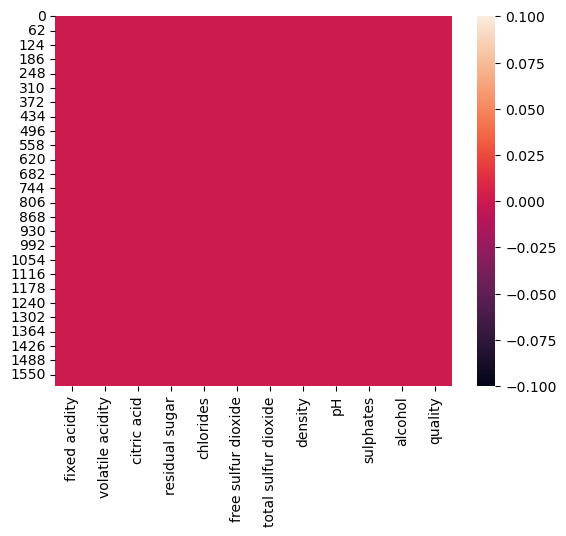

In [7]:
# checking null values
print("Totally there are {} null values in the dataset".format(df.isnull().sum().sum()))

sns.heatmap(df.isnull())

<div style="background:url(https://i.imgur.com/sxM8yrh.png) no-repeat; background-size:contain; width:100%; padding:15px 0">
    <h2> <span style="font-family: 'Jura', sans-serif !important;"> <em>Visualization</em> </span></h2>
</div>

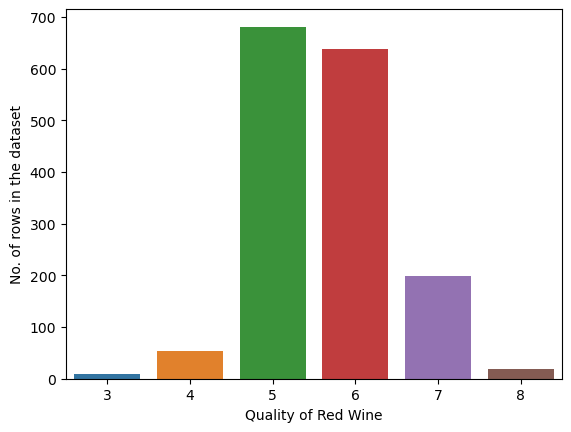

In [8]:
sns.countplot(x ='quality', data = df)
plt.xlabel('Quality of Red Wine')
plt.ylabel('No. of rows in the dataset')
plt.show()

We can observe the various categories of red wine quality in the countplot representation, and it reveals that the number of data points for quality scores 5 and 6 is significantly higher than its counterparts. This shows an imbalance that must be corrected so that our machine learning model is not biased to a specific value during prediction.

<div style="background:url(https://i.imgur.com/sxM8yrh.png) no-repeat; background-size:contain; width:100%; padding:15px 0">
    <h2> <span style="font-family: 'Jura', sans-serif !important;"> <em>Unvariate Analysis</em> </span></h2>
</div>

In [11]:
palette = sns.color_palette("Spectral")
def plot(columnname):
    
    plt.figure(figsize=(15, 5))
    
    sns.histplot(data=df,x=columnname,kde=True, palette=palette, bins=20, multiple="stack", alpha=.3)
    
    plt.title(columnname)

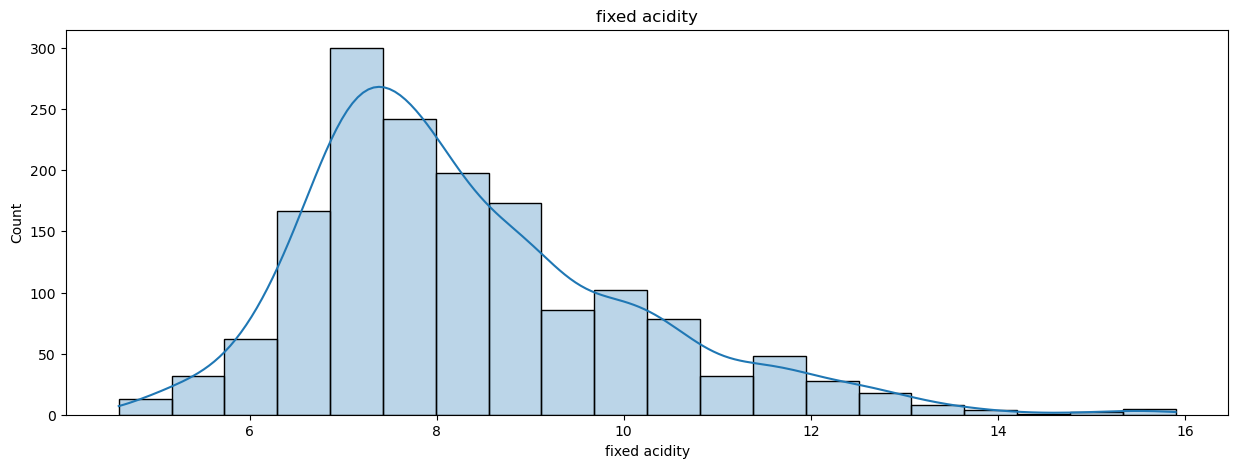

In [12]:
plot('fixed acidity')

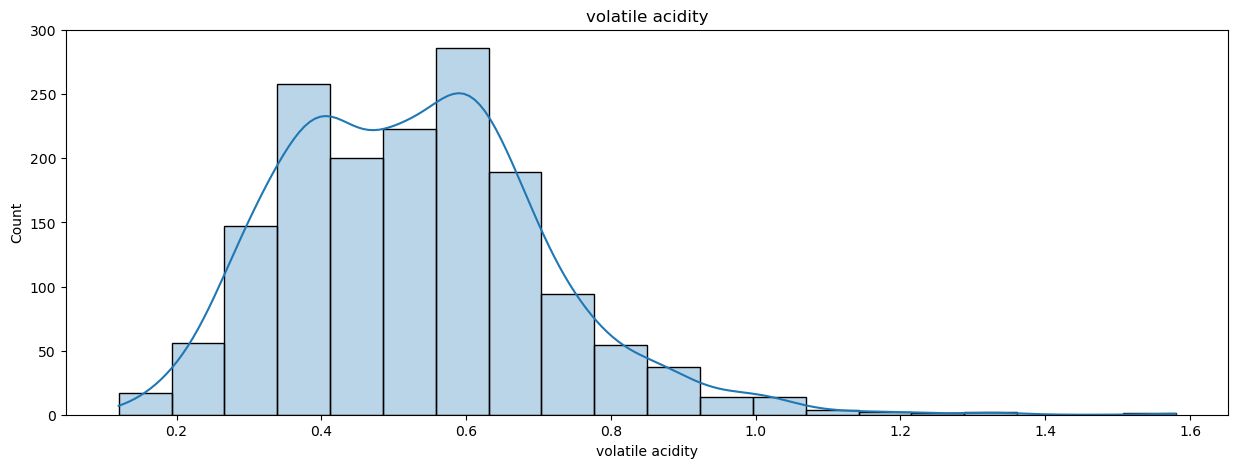

In [13]:
plot('volatile acidity')

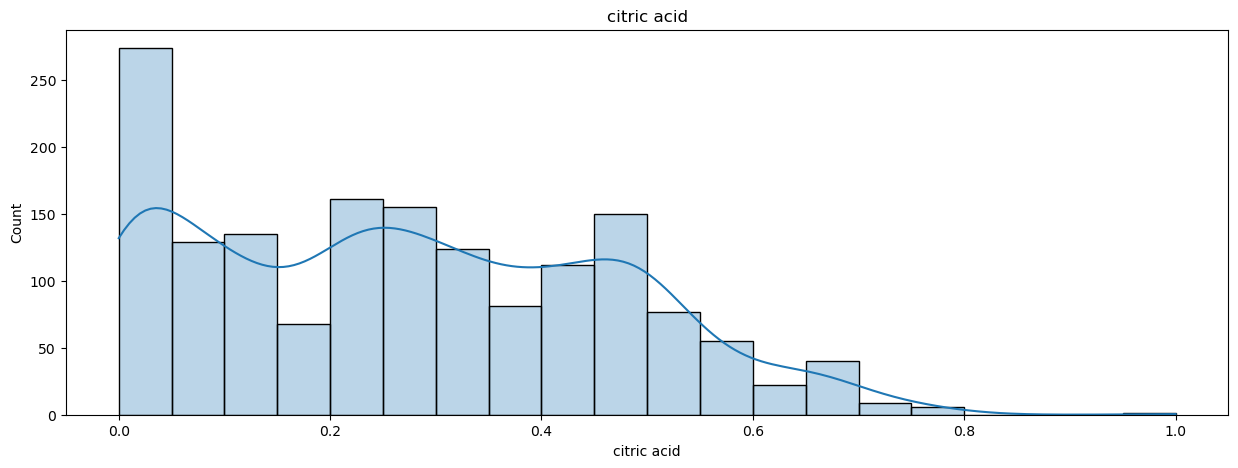

In [14]:
plot('citric acid')

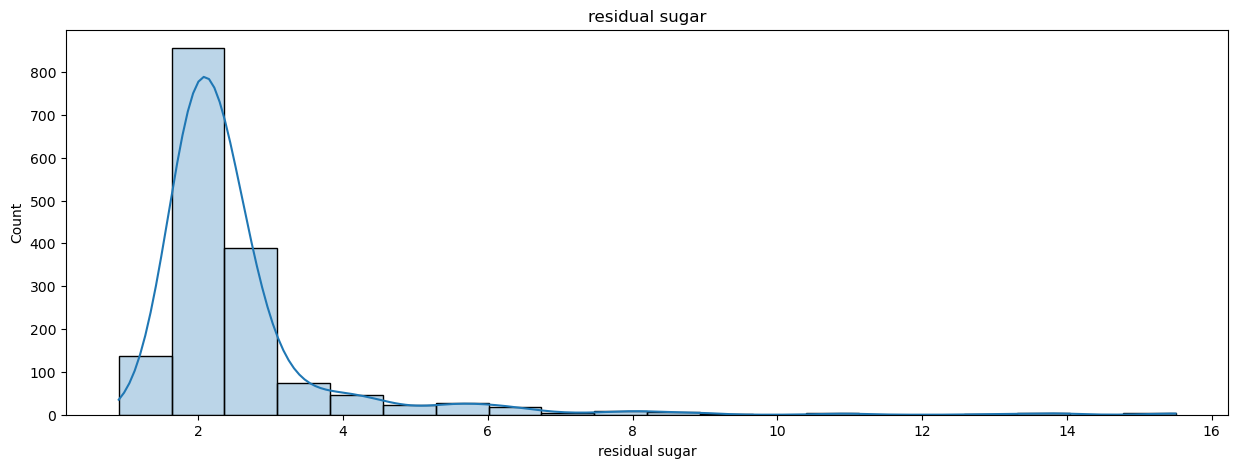

In [15]:
plot('residual sugar')

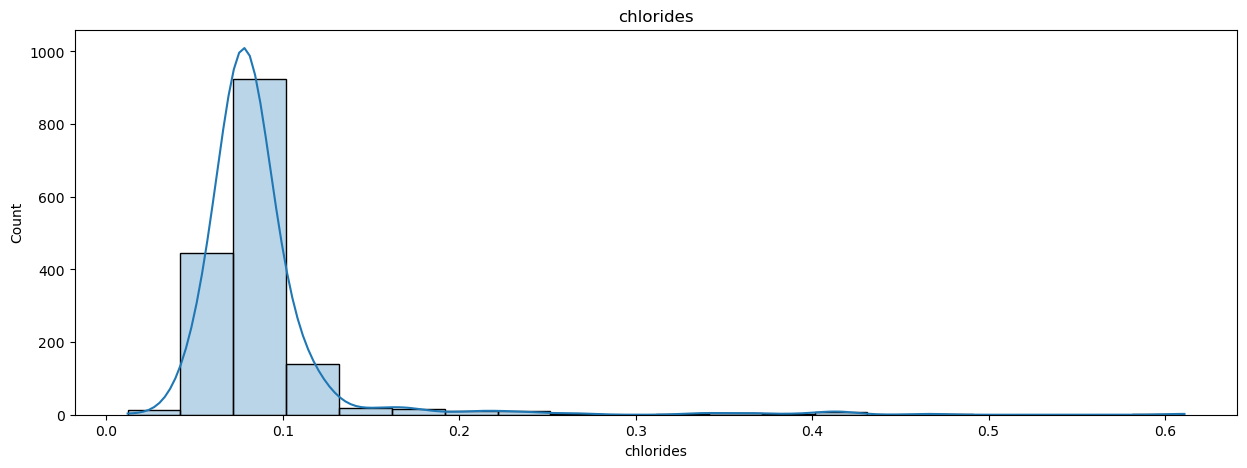

In [16]:
plot('chlorides')

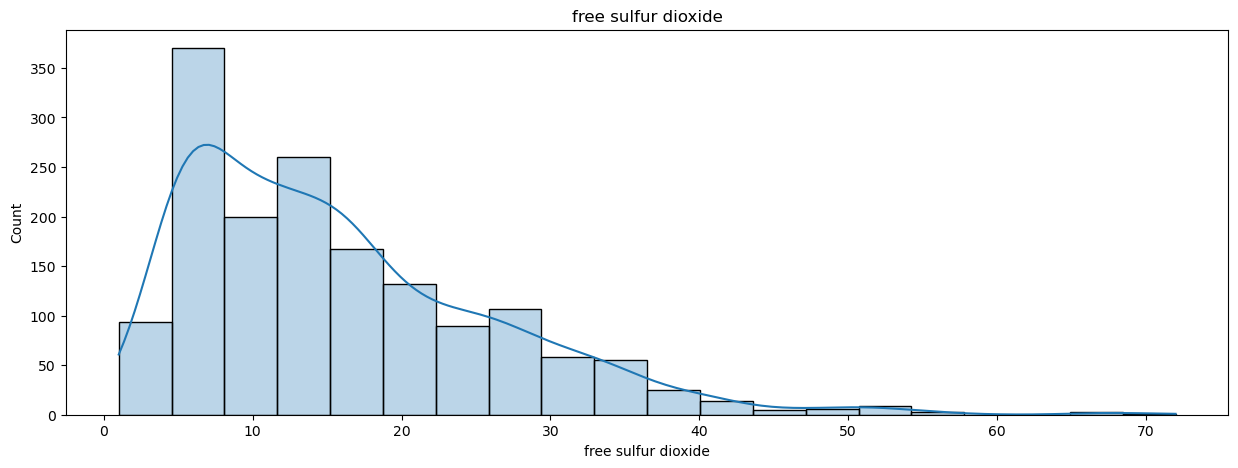

In [17]:
plot('free sulfur dioxide')

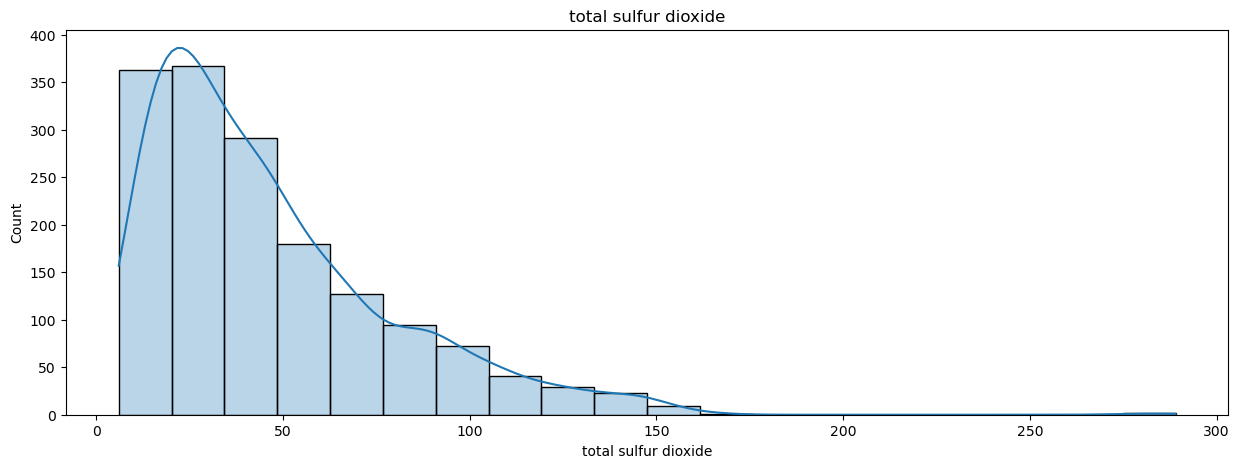

In [18]:
plot('total sulfur dioxide')

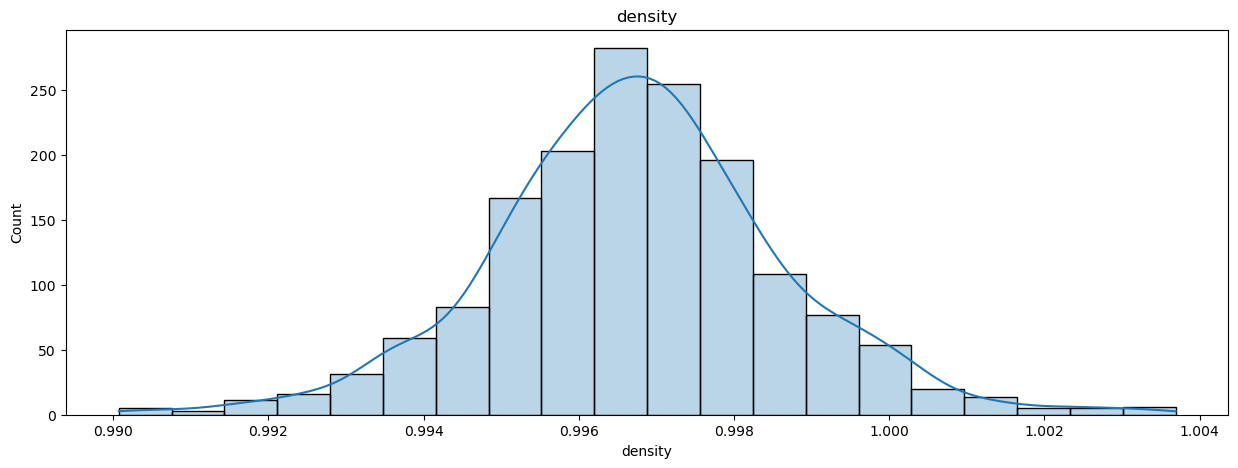

In [19]:
plot('density')

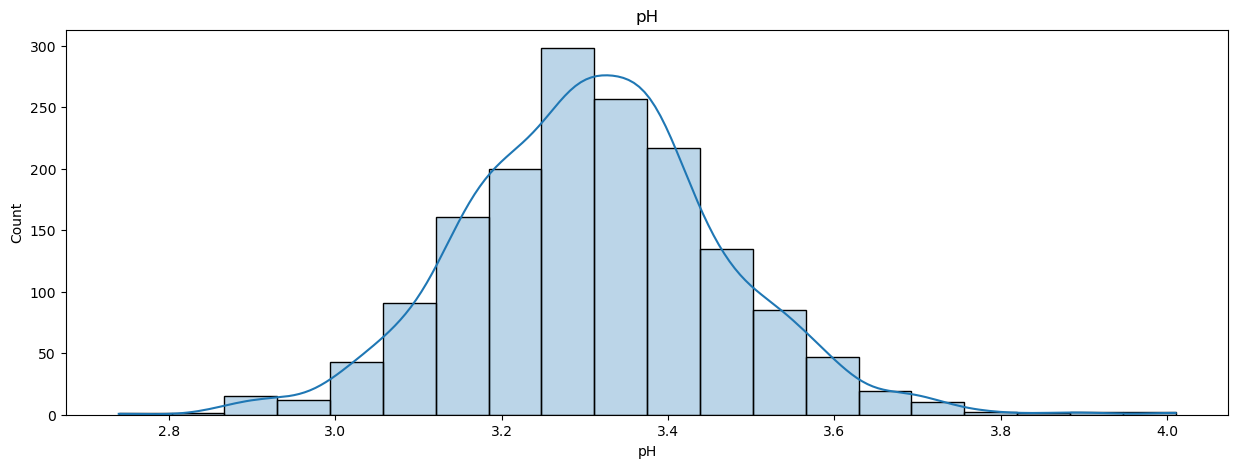

In [20]:
plot('pH')

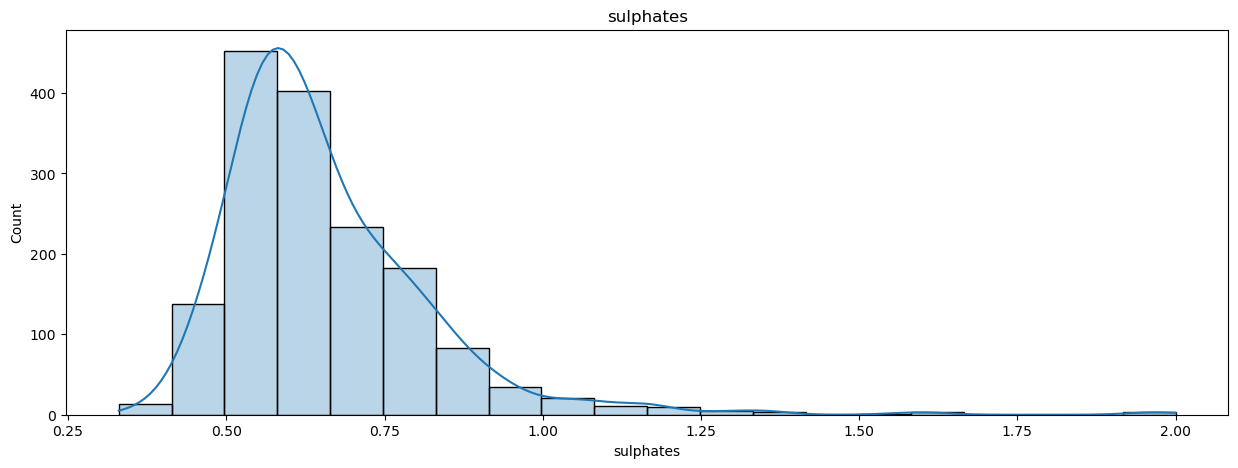

In [21]:
plot('sulphates')

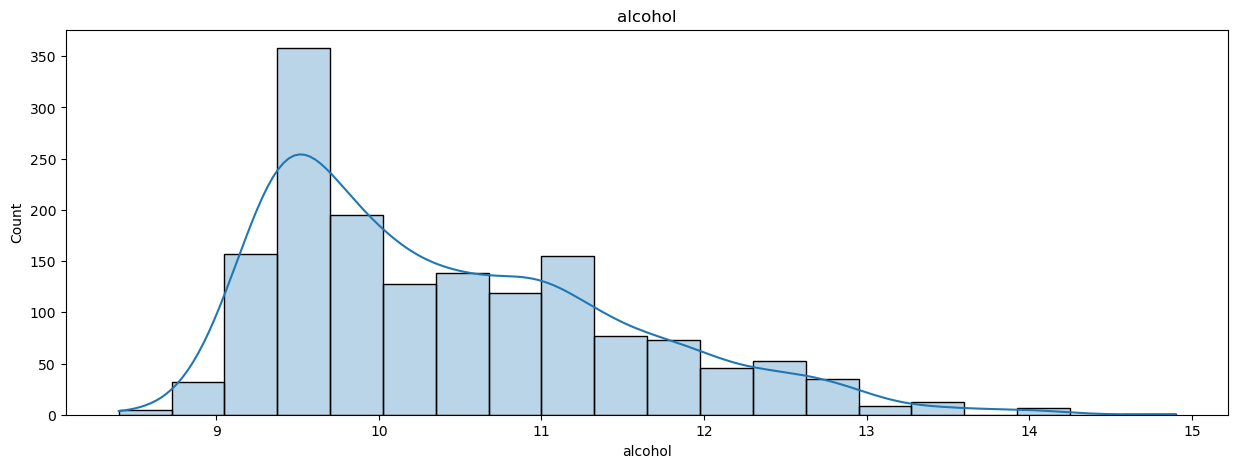

In [22]:
plot('alcohol')

Observation = Most of the features are right skewed

<div style="background:url(https://i.imgur.com/sxM8yrh.png) no-repeat; background-size:contain; width:100%; padding:15px 0">
    <h2> <span style="font-family: 'Jura', sans-serif !important;"> <em>Bivariate Analysis</em> </span></h2>
</div>

In [23]:
def viz_insights(field):
    plt.figure(figsize=(15, 5))
    sns.histplot(data=df, x=field, hue="quality", kde=True,  bins=20, multiple="stack", alpha=.3)
    plt.legend([ 'good wine','normal wine','bad wine'])
    if field == "density": plt.title(f"\n{field.capitalize()} of red wine\n\n")
    else: plt.title(f"\n{field} contents in red wine\n\n")
    plt.figtext(0.75, 0.3, f'{df[field].describe()}')
    sns.despine()

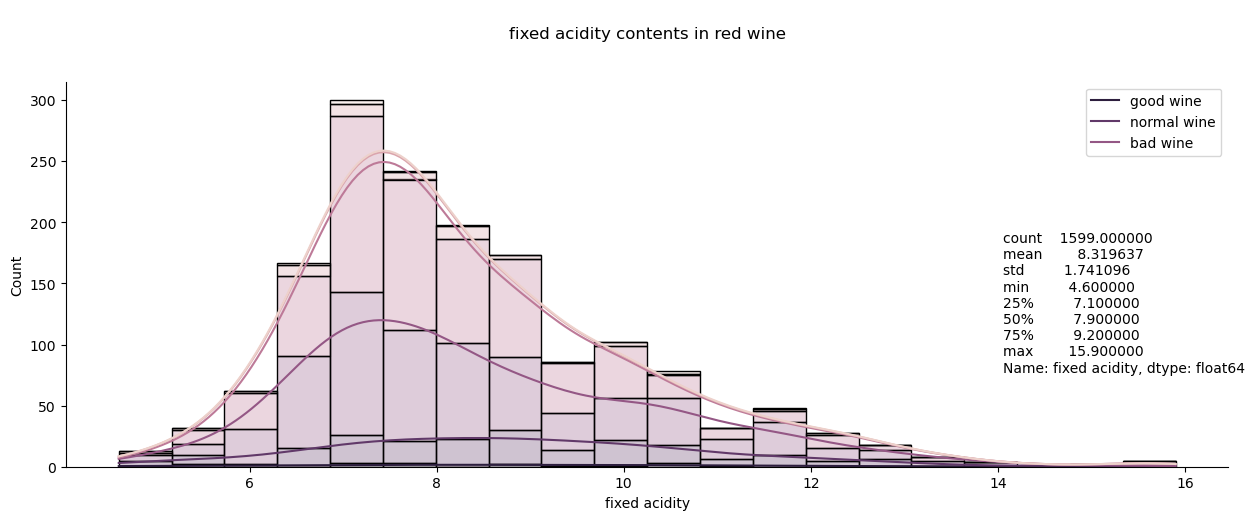

In [24]:
viz_insights('fixed acidity')

In [25]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


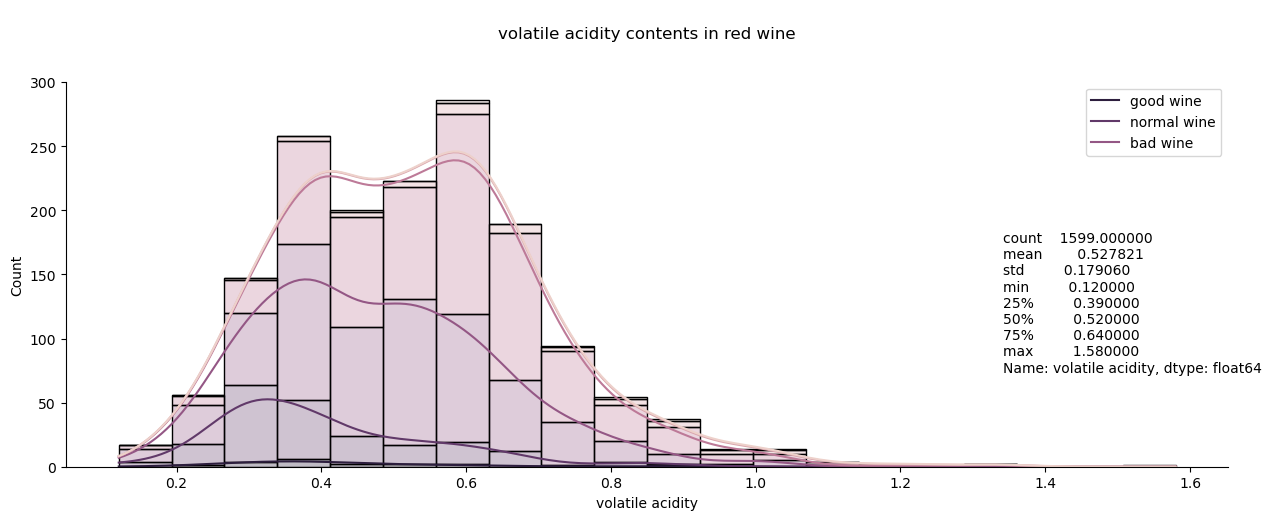

In [26]:
viz_insights('volatile acidity')

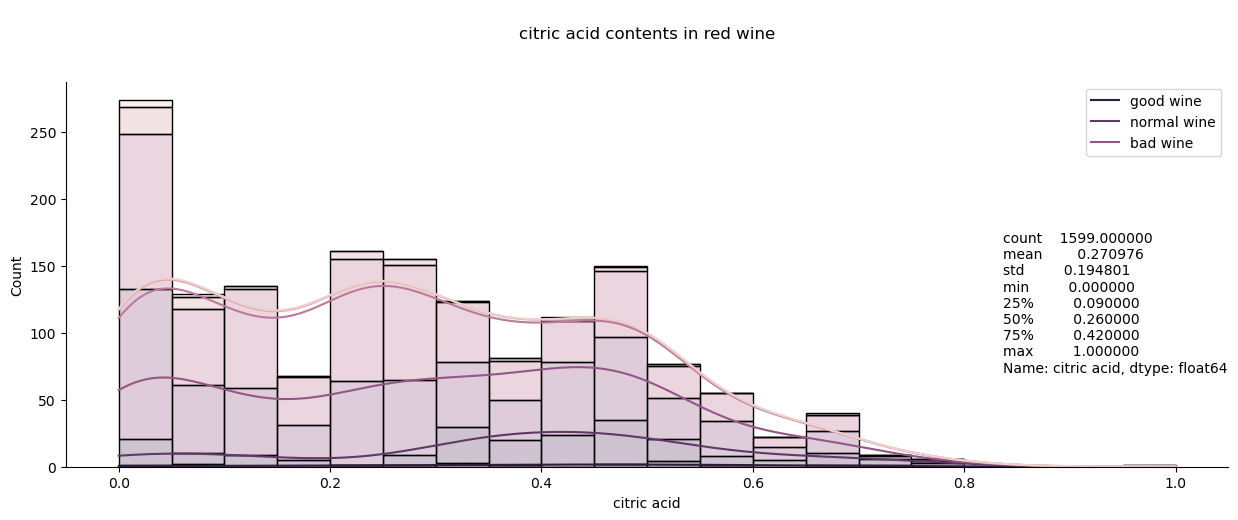

In [27]:
viz_insights('citric acid')

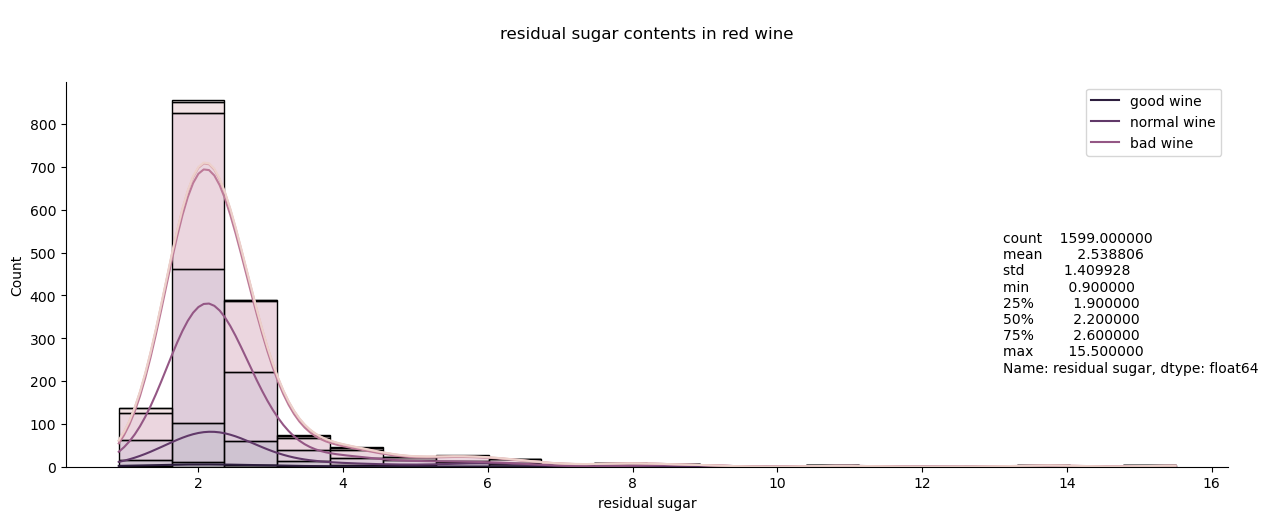

In [28]:
viz_insights('residual sugar')

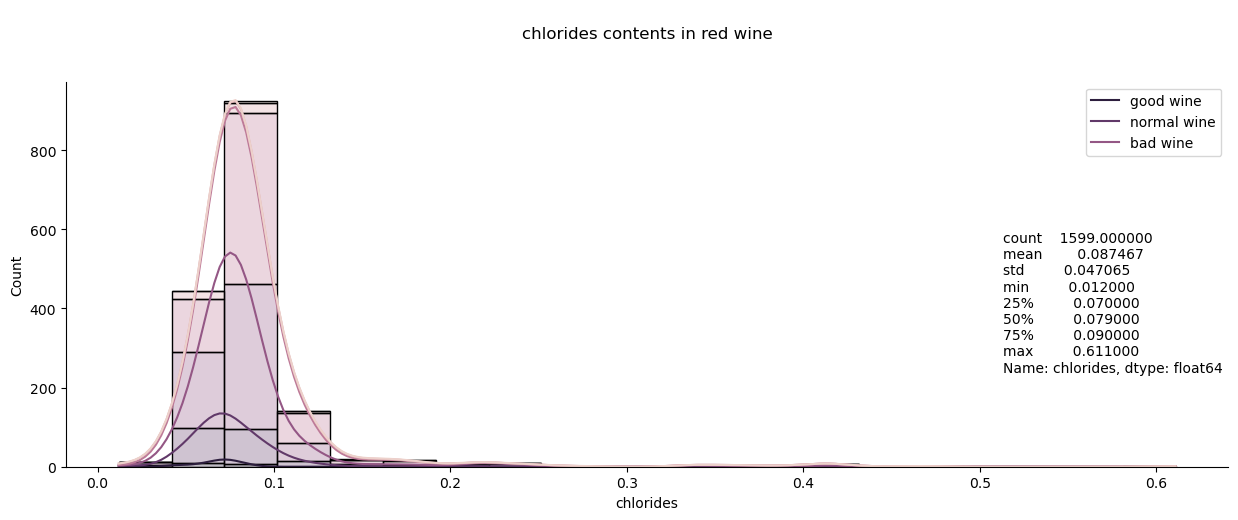

In [29]:
viz_insights('chlorides')

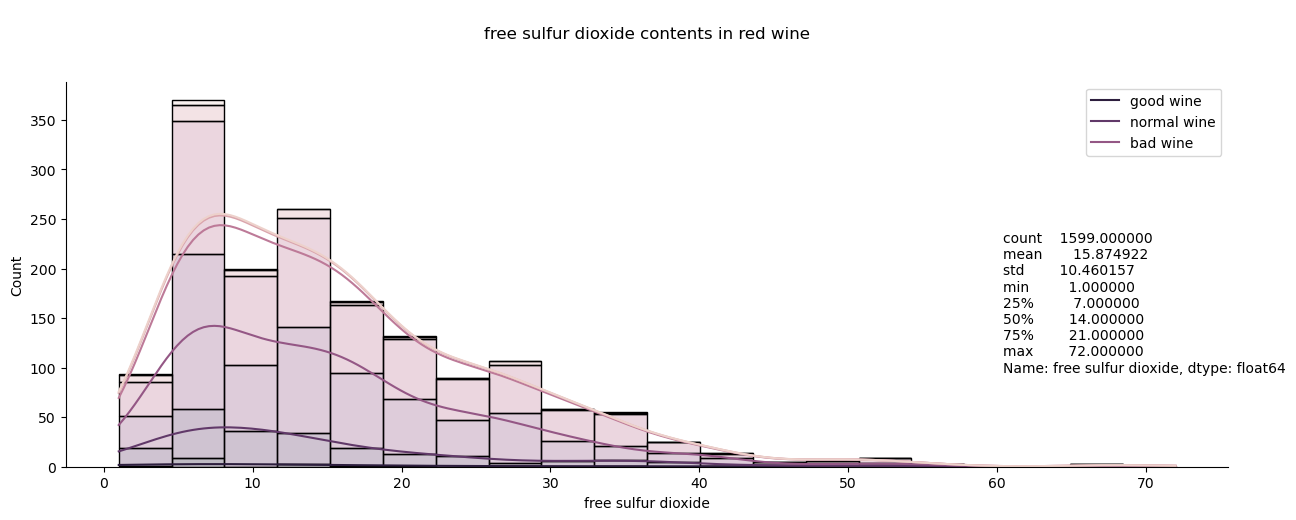

In [30]:
viz_insights('free sulfur dioxide')

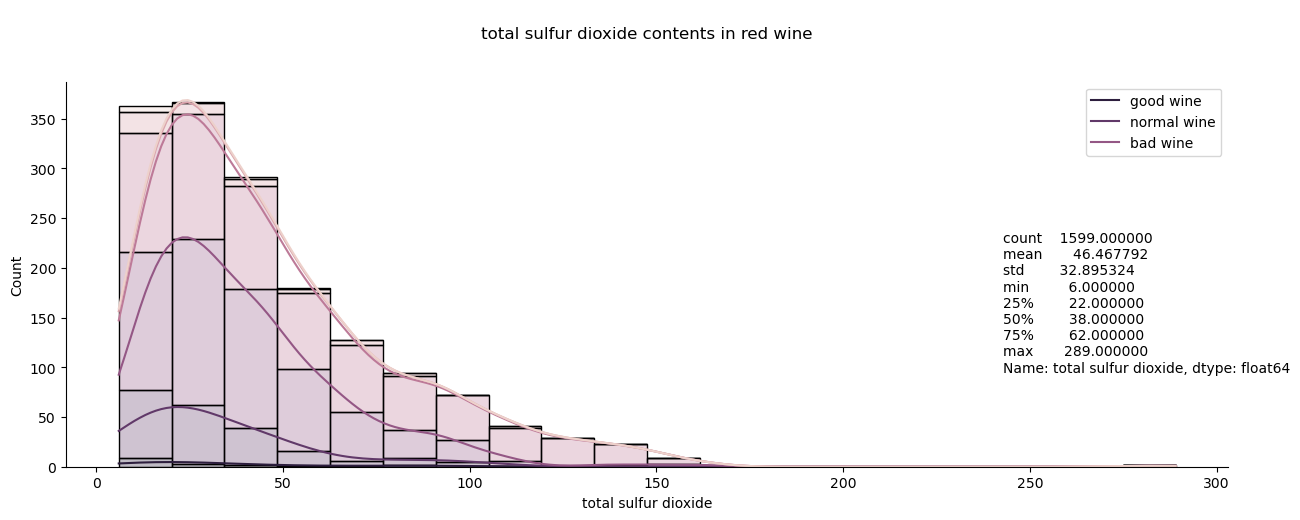

In [31]:
viz_insights('total sulfur dioxide')

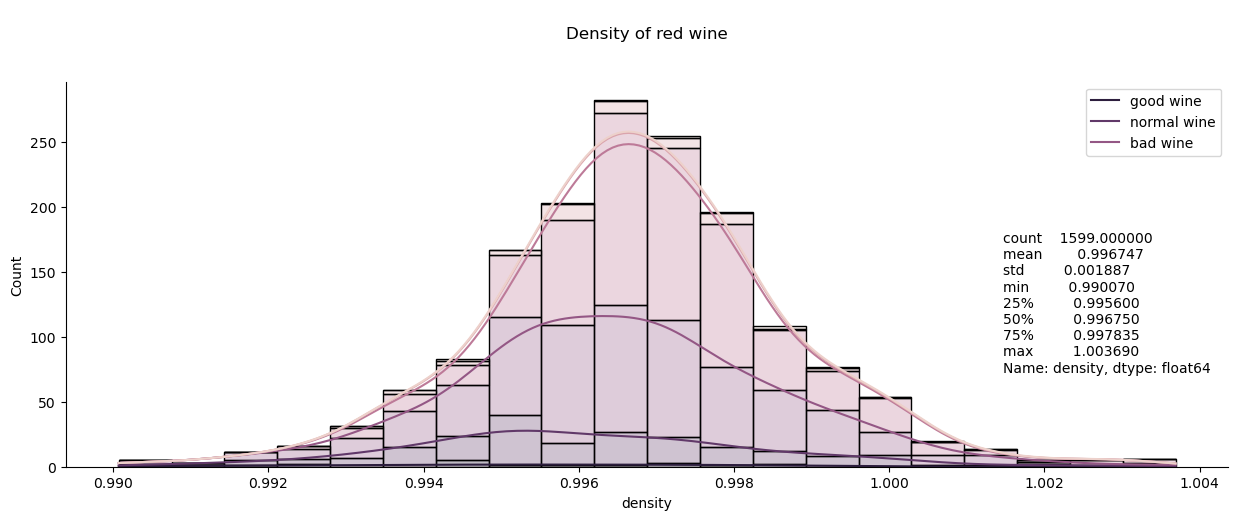

In [32]:
viz_insights('density')

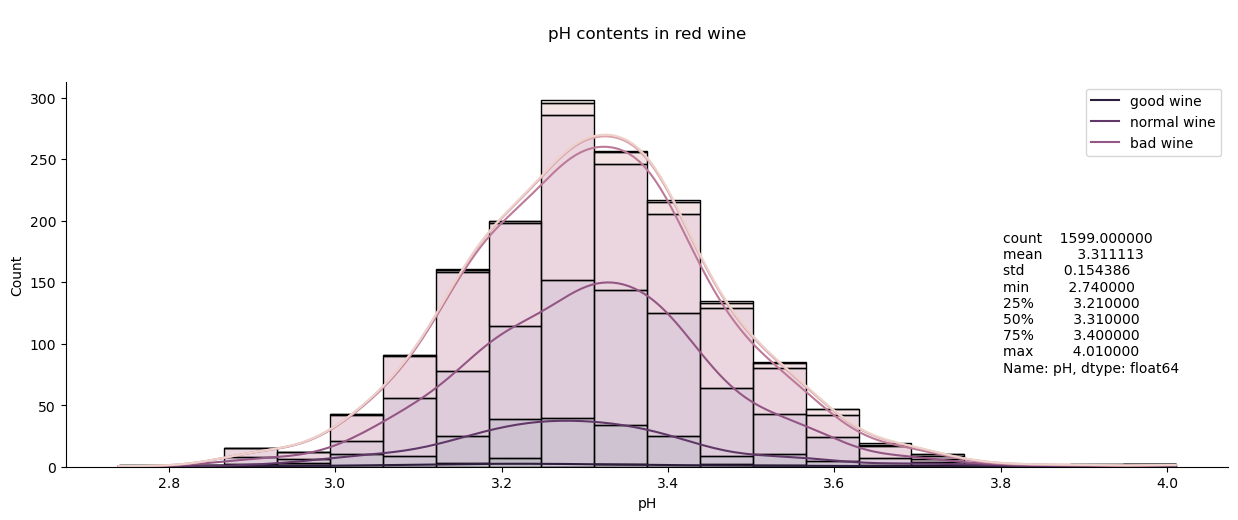

In [33]:
viz_insights('pH')

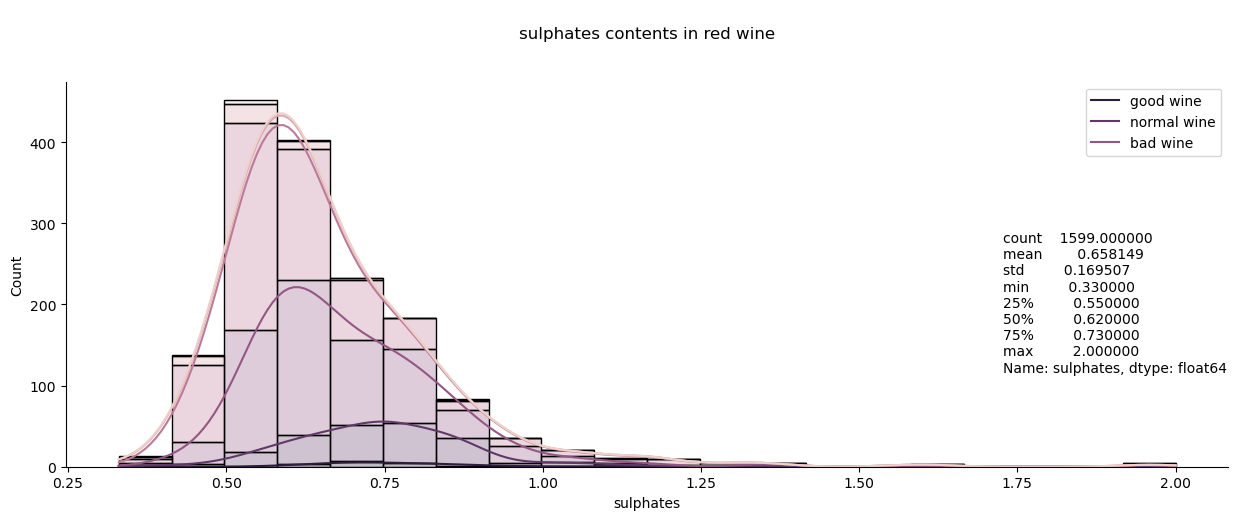

In [34]:
viz_insights('sulphates')

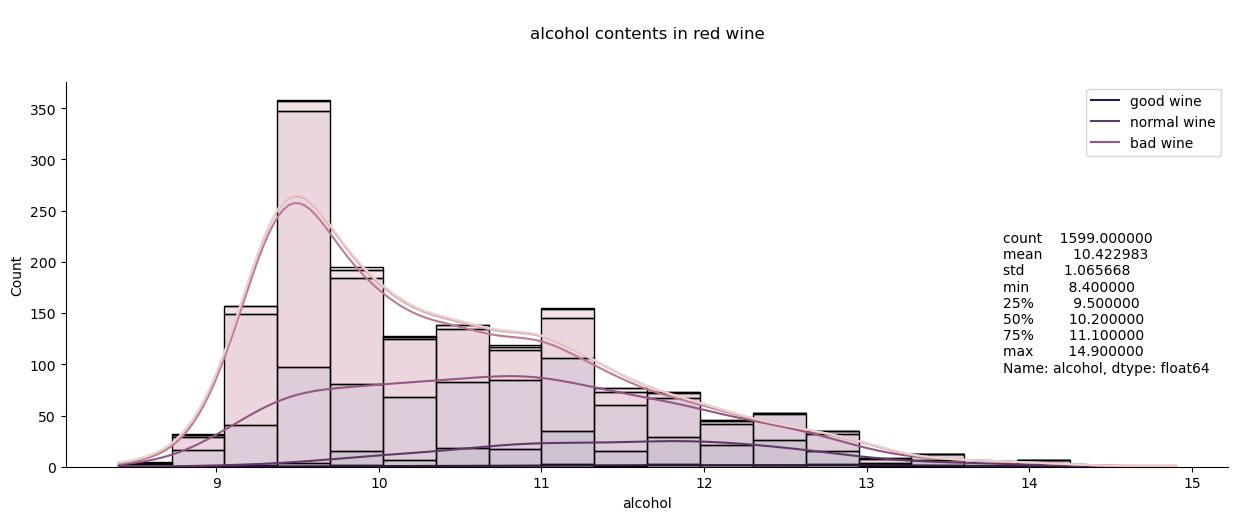

In [35]:
viz_insights('alcohol')

The feature vs label barplot allows us to see the trend correlating to the impact each has on predicting the quality column. Observations on feature versus label are as follows: 01. fixed acidity vs. quality - no predictable trend 02. Volatile acidity versus. quality - a downward trend 03. Citric acid versus quality - a growing trend 04. Relative sugar vs. quality - no consistent pattern 05. Chlorides versus. quality - a downward trend 06. free sulphur dioxide vs. quality - no consistent pattern as it rises and then falls 07. Total sulphur dioxide vs. quality - no consistent pattern as it rises and then falls 08. density vs. quality - no discernible pattern 09. There is no correlation between pH and quality. 10. Sulphates vs. quality - a growing trend 11. Alcohol versus quality - a growing trend

As a result, we may deduce that citric acid, sulphates, and alcohol columns all play important roles in producing higher-quality wine.

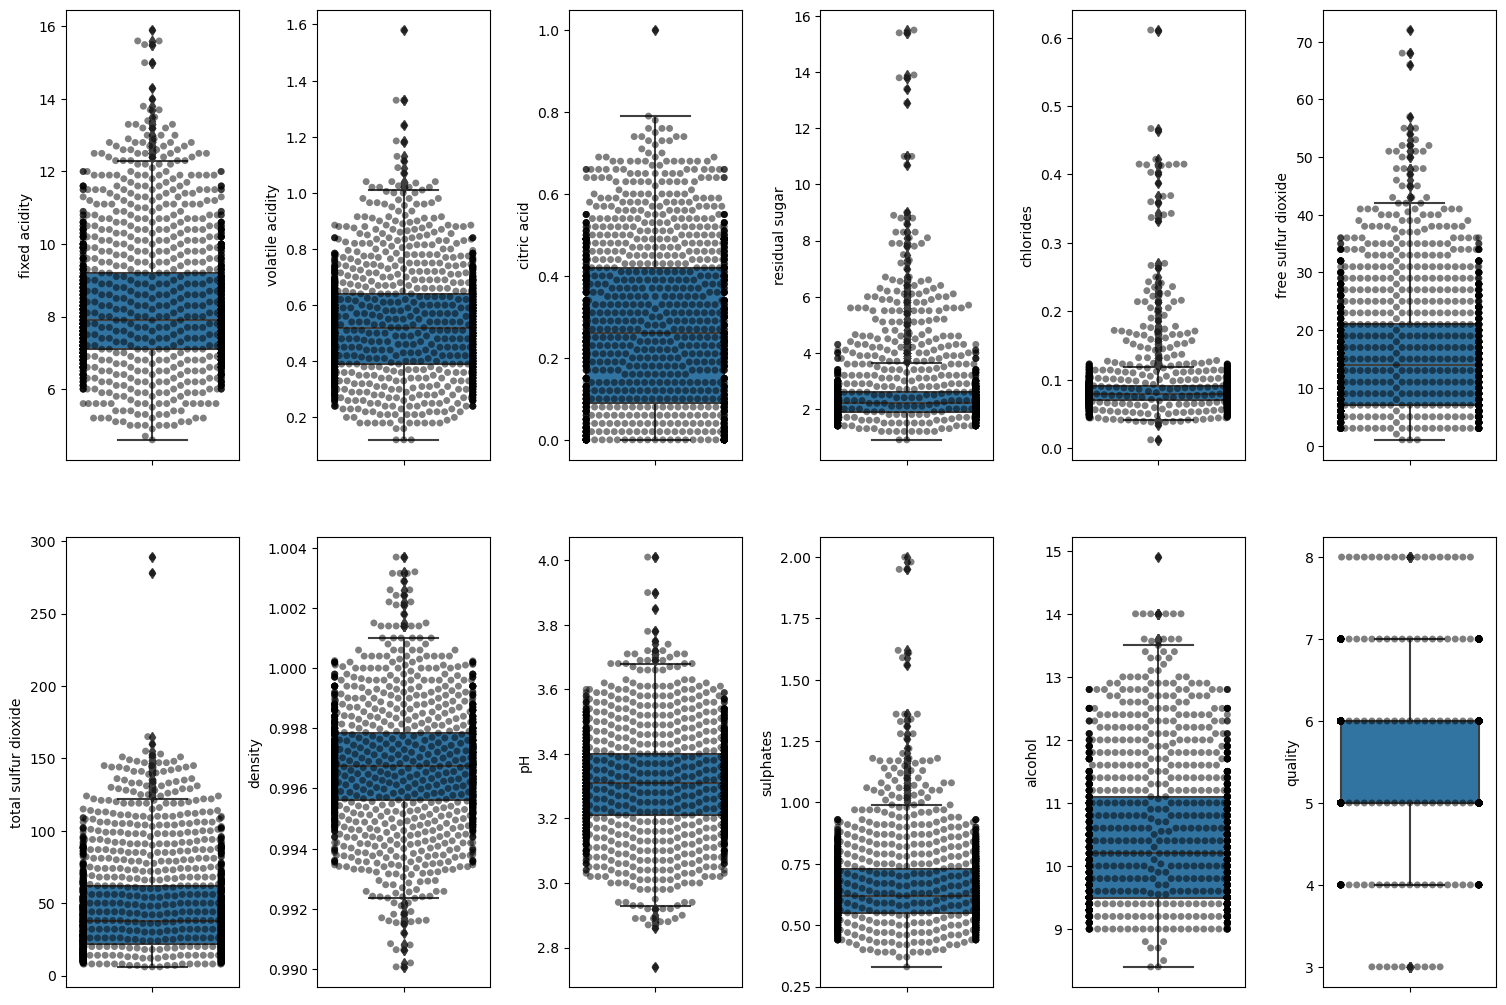

In [36]:
fig, axes = plt.subplots(ncols=6, nrows=2, figsize=(15, 10))
axes = axes.flatten()

for index, (col, value) in enumerate(df.items()):
    ax = axes[index]
    
    sns.boxplot(y=col, data=df, ax=ax)
    sns.swarmplot(y=col, data=df, ax=ax, color='black', alpha=0.5)
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()


The above boxplot clearly shows the whisker details and outliers. I'm disregarding the continuous outlier regions, however outliers that are single values and far away from the whiskers of the boxplot may need to be dealt depending on subsequent analyses. Right now, I'm just trying to keep as much info as possible in the given dataset for better prediction.

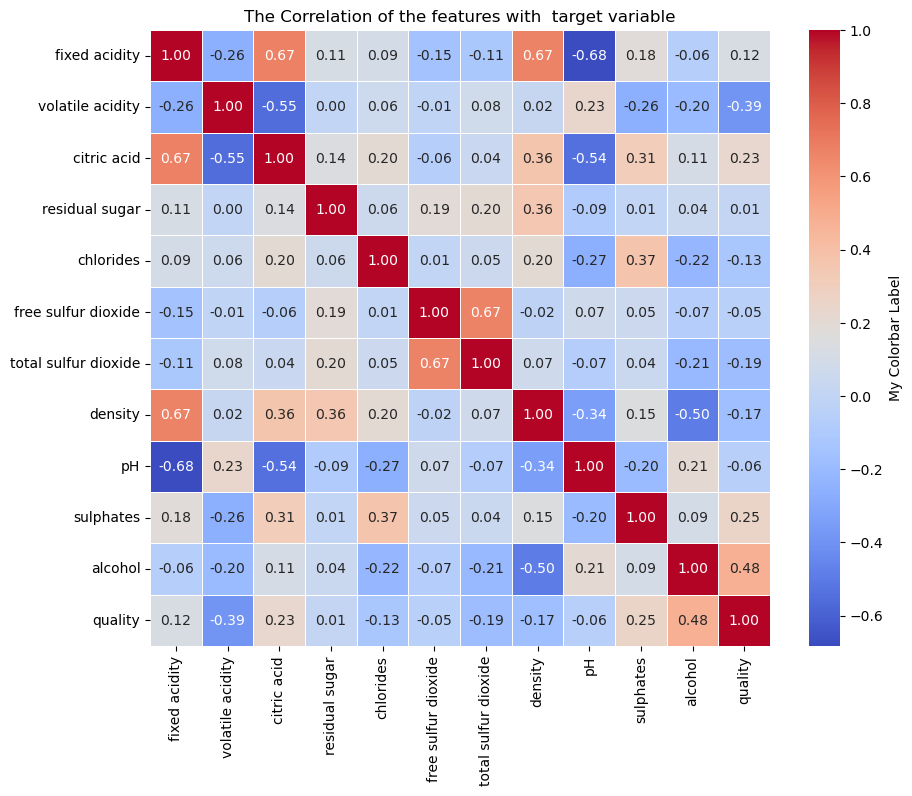

In [9]:
#checking the  correlation  



# Set the figure size
plt.figure(figsize=(10, 8))

# Set the colormap (optional)
cmap = 'coolwarm'  # Choose any appropriate colormap from Matplotlib or provide a custom one

# Set the annotations (optional)
annot = True  # Set to False if you don't want the values to be displayed on the heatmap

# Set the advanced parameters
cbar_kws = {'label': 'My Colorbar Label'}  # Custom label for the colorbar
linewidths = 0.5  # Width of the lines separating each cell
linecolor = 'white'  # Color of the lines separating each cell
fmt = '.2f'  # Format specification for the annotations (e.g., '.2f' for two decimal places)

# Create the heatmap
sns.heatmap(df.corr(), cmap=cmap, annot=annot, cbar_kws=cbar_kws, linewidths=linewidths,
            linecolor=linecolor, fmt=fmt)

# Add a title (optional)
plt.title('The Correlation of the features with  target variable')

# Display the heatmap
plt.show()


The above heatmap depicts the correlation matrix data, which demonstrates positive and negative correlations between the target label and other future columns. A correlation of 0 shows that no link exists between the variables. Looking at the graph above, I find that the quality column is positively connected with alcohol and negatively correlated with volatile acidity. The quality column has the lowest correlation with residual sugar, with a coefficient value of 0.014, which is close to zero. Similarly, we can divide all of the other positively and negatively linked characteristic columns by the target label.There are also some extremely positive and negative correlated feature columns that can cause multicollinearity. Perfect multicollinearity occurs when the correlation coefficient, presuming it to be the variable 'r,' is exactly +1 or -1. However, if this 'r' is close to -1 or +1, one of the characteristics should be deleted from the model if possible.

Columns fixed acidity and citric acid are currently favourably associated with a value of 0.672, which is close to 1. Similarly, the fixed acidity and density of columns are positively associated, with a value of 0.668 being near to 1. The other two columns that are positively associated are free sulphur dioxide and total sulphur dioxide, both of which have values close to one. The only columns that appear to be negatively associated are fixed acitidy and pH, with a value of -0.683 being close to the value -1.

If we need to improve the accuracy of our machine learning models, we may need to deal with multicollinearity later.

## Dropping a Column

In [47]:
df = df.drop('free sulfur dioxide', axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


Because I believe that free sulphur dioxide and total sulphur dioxide both indicate the same feature of sulphur dioxide, I am deleting the free option and retaining only the total option in our dataset.

In [51]:
# outlier removal
# Z score method

z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


<a id="dataPrep"></a>
<div style="background:url(https://i.imgur.com/sxM8yrh.png) no-repeat; background-size:contain; width:100%; padding:20px 0">
    <h2> <span style="font-family: 'Jura', sans-serif !important;"> <em> Preprocessing</em> </span></h2>
</div>

In [38]:
#Now seperate the dataset as response variable and feature variabes
X = df.drop('quality', axis = 1)
y = df['quality']

In [52]:
# handing class imbalance

y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Counting the number of rows occupied by each category by listing the values of our label column. This indicates a class imbalance, which we shall correct using the oversampling method.

In [99]:
from imblearn.over_sampling import SMOTE
# adding samples to make all the categorical quality values same

oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)
y_smote.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [100]:
# label binarization

Y = y_smote.apply(lambda y_value:1 if y_value>=6 else 0) # 1 is for good quality and 0 for bad (not good) quality
Y # Displaying the label after applying label binarization

0       0
1       0
2       0
3       1
4       0
       ..
4081    1
4082    1
4083    1
4084    1
4085    1
Name: quality, Length: 4086, dtype: int64

Using the label binarization technique we have tagged the categories present in our target label to 2 major class that are 0 for bad quality wine and 1 for good quality wine.

<a id="dataPrep_fScale"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:90%; padding:15px 0">
    <h3> <span style="font-family: 'Jura', sans-serif !important;"> <em>Feature Scaling</em> </span></h3>
</div>


In [101]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()


In [102]:
X = sc.fit_transform(X)
Xx = pd.DataFrame(X)
Xx

,0,1,2,3,4,5,6,7,8,9,10
0,-0.543065,0.484901,-1.276709,-0.526756,-0.257184,-0.255895,-0.081979,0.696359,1.193943,-0.617591,-1.121952
1,-0.303225,1.220138,-1.276709,0.038336,0.268103,1.302473,1.116560,0.168712,-0.828936,0.171096,-0.779806
2,-0.303225,0.729980,-1.082171,-0.203846,0.124843,0.189353,0.644408,0.274241,-0.437411,-0.026076,-0.779806
3,1.735417,-1.230654,1.446832,-0.526756,-0.281061,0.411977,0.862325,0.801889,-1.089952,-0.486143,-0.779806
4,-0.543065,0.484901,-1.276709,-0.526756,-0.257184,-0.255895,-0.081979,0.696359,1.193943,-0.617591,-1.121952
...,...,...,...,...,...,...,...,...,...,...,...
4081,0.487982,-1.133340,1.304239,0.086594,-0.219507,-0.855024,-0.717927,-0.069252,-1.088660,1.899275,0.660027
4082,-1.654233,0.315612,-1.085263,-0.758673,-1.010059,0.802534,1.859952,-2.601896,1.312004,1.091230,2.372194
4083,-1.658367,0.214219,-1.091970,-0.736408,-1.011705,0.925338,1.857448,-2.660108,1.285007,1.091230,2.437072
4084,-0.625305,-0.847858,0.215683,-0.496761,-0.599674,0.259305,-0.320636,-1.016667,-0.612669,0.572978,0.530121


<a id="dataPrep_split"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:90%; padding:20px 0">
    <h3> <span style="font-family: 'Jura', sans-serif !important;"> <em>Train, test split</em> </span></h3>
</div>

In [103]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

<a id="model"></a>
<div style="background:url(https://i.imgur.com/sxM8yrh.png) no-repeat; background-size:contain; width:100%; padding:20px 0">
    <h2> <span style="font-family: 'Jura', sans-serif !important;"> <em> Models Training</em> </span></h2>
</div>

In [104]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I've defined a class that will perform the train-test split, machine learning model training, label value prediction, accuracy score, classification report generation, cross validation score, and the result of the difference between the accuracy score and cross validation score for any machine learning model that requires this function.

<a id="model"></a>
<div style="background:url(https://i.imgur.com/sxM8yrh.png) no-repeat; background-size:contain; width:100%; padding:20px 0">
    <h2> <span style="font-family: 'Jura', sans-serif !important;"> <em>Decision Tree Classifier</em> </span></h2>
</div>

In [105]:
model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 89.97555012224939

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       397
           1       0.90      0.90      0.90       421

    accuracy                           0.90       818
   macro avg       0.90      0.90      0.90       818
weighted avg       0.90      0.90      0.90       818

Cross Validation Score: 85.07554922445706

Accuracy Score - Cross Validation Score is 4.900000897792324


<a id="model"></a>
<div style="background:url(https://i.imgur.com/sxM8yrh.png) no-repeat; background-size:contain; width:100%; padding:20px 0">
    <h2> <span style="font-family: 'Jura', sans-serif !important;"> <em>Logistic Regrssion</em> </span></h2>
</div>

In [106]:

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 87.1638141809291

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       397
           1       0.87      0.88      0.88       421

    accuracy                           0.87       818
   macro avg       0.87      0.87      0.87       818
weighted avg       0.87      0.87      0.87       818

Cross Validation Score: 84.9031730973536

Accuracy Score - Cross Validation Score is 2.260641083575493


<a id="model"></a>
<div style="background:url(https://i.imgur.com/sxM8yrh.png) no-repeat; background-size:contain; width:100%; padding:20px 0">
    <h2> <span style="font-family: 'Jura', sans-serif !important;"> <em>Support Vector Classifier</em> </span></h2>
</div>

In [107]:
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 92.1760391198044

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       397
           1       0.94      0.90      0.92       421

    accuracy                           0.92       818
   macro avg       0.92      0.92      0.92       818
weighted avg       0.92      0.92      0.92       818

Cross Validation Score: 87.98747878965622

Accuracy Score - Cross Validation Score is 4.188560330148178


<a id="model"></a>
<div style="background:url(https://i.imgur.com/sxM8yrh.png) no-repeat; background-size:contain; width:100%; padding:20px 0">
    <h2> <span style="font-family: 'Jura', sans-serif !important;"> <em>Random Forest Classifier</em> </span></h2>
</div>

In [108]:
model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 94.37652811735941

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       397
           1       0.96      0.93      0.94       421

    accuracy                           0.94       818
   macro avg       0.94      0.94      0.94       818
weighted avg       0.94      0.94      0.94       818

Cross Validation Score: 89.1867198558744

Accuracy Score - Cross Validation Score is 5.1898082614850125


<a id="model"></a>
<div style="background:url(https://i.imgur.com/sxM8yrh.png) no-repeat; background-size:contain; width:100%; padding:20px 0">
    <h2> <span style="font-family: 'Jura', sans-serif !important;"> <em>KNeighbors Classifier</em> </span></h2>
</div>

In [109]:
model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 90.4645476772616

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       397
           1       0.92      0.89      0.91       421

    accuracy                           0.90       818
   macro avg       0.90      0.90      0.90       818
weighted avg       0.91      0.90      0.90       818

Cross Validation Score: 86.64174794181108

Accuracy Score - Cross Validation Score is 3.8227997354505305


<a id="model"></a>
<div style="background:url(https://i.imgur.com/sxM8yrh.png) no-repeat; background-size:contain; width:100%; padding:20px 0">
    <h2> <span style="font-family: 'Jura', sans-serif !important;"> <em>Extra Tree </em> </span></h2>
</div>

In [110]:
model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 94.13202933985329

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       397
           1       0.95      0.94      0.94       421

    accuracy                           0.94       818
   macro avg       0.94      0.94      0.94       818
weighted avg       0.94      0.94      0.94       818

Cross Validation Score: 89.30902909744937

Accuracy Score - Cross Validation Score is 4.823000242403921


<a id="model"></a>
<div style="background:url(https://i.imgur.com/sxM8yrh.png) no-repeat; background-size:contain; width:100%; padding:20px 0">
    <h2> <span style="font-family: 'Jura', sans-serif !important;"> <em>Hyper parameter tuning </em> </span></h2>
</div>

In [81]:
# Choosing Support Vector Classifier

svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}
GSCV = GridSearchCV(SVC(), svc_param, cv=5)
#Using the Grid Search CV method for hyper parameter tuning my best model.

In [83]:
GSCV.fit(X_train,y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

In [85]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

<a id="model"></a>
<div style="background:url(https://i.imgur.com/sxM8yrh.png) no-repeat; background-size:contain; width:100%; padding:20px 0">
    <h2> <span style="font-family: 'Jura', sans-serif !important;"> <em>Final Model </em> </span></h2>
</div>

In [111]:
Final_Model = SVC(decision_function_shape='ovr', gamma='auto', kernel='rbf', probability=False, random_state=51,
                 shrinking=True, verbose=False)
Classifier = Final_Model.fit(X_train, y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)
#Successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it

Accuracy score for the Best Model is: 86.91931540342298


<a id="model"></a>
<div style="background:url(https://i.imgur.com/sxM8yrh.png) no-repeat; background-size:contain; width:100%; padding:20px 0">
    <h2> <span style="font-family: 'Jura', sans-serif !important;"> <em>Auc Roc Curve </em> </span></h2>
</div>

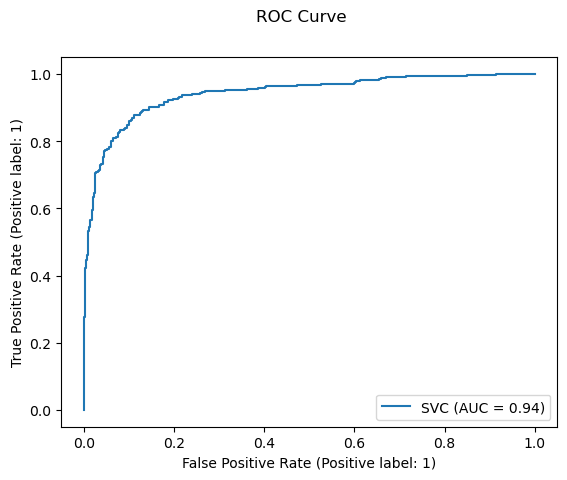

In [112]:
disp = metrics.plot_roc_curve(Final_Model, X_test, y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

* I've created the ROC Curve for my final model, and the AUC for my final model is 94%.

<a id="model"></a>
<div style="background:url(https://i.imgur.com/sxM8yrh.png) no-repeat; background-size:contain; width:100%; padding:20px 0">
    <h2> <span style="font-family: 'Jura', sans-serif !important;"> <em>Confusion Matrix</em> </span></h2>
</div>

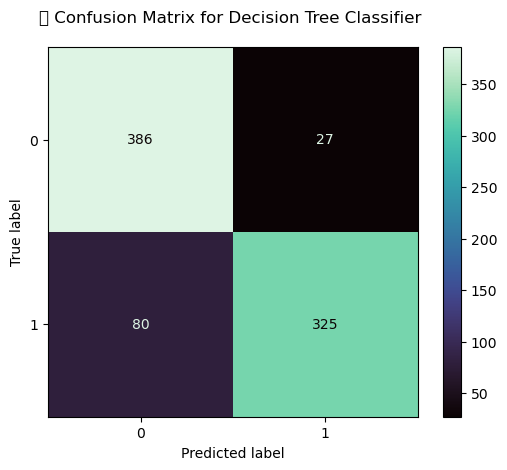

In [114]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

<a id="model"></a>
<div style="background:url(https://i.imgur.com/sxM8yrh.png) no-repeat; background-size:contain; width:100%; padding:20px 0">
    <h2> <span style="font-family: 'Jura', sans-serif !important;"> <em>Saving the model</em> </span></h2>
</div>

In [117]:
filename = "Red_wine_quality_prediction.pkl"
joblib.dump(Final_Model, filename)
['Red_wine_quality_prediction.pkl']



['Red_wine_quality_prediction.pkl']

In [119]:


pickle.dump(model, open('redwine.pkl', 'wb'))
pickled_model = pickle.load(open('redwine.pkl', 'rb'))
pickled_model.predict(X_test)

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,